In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import time



In [22]:
iris = datasets.load_iris()

data = np.asarray(iris.data)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
data = torch.FloatTensor(data)
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [47]:
def new_weights(lr, weights_i, x_i, y_i, multiplier, original_vector):
    return lr*multiplier*(original_vector - weights_i)

In [48]:
lr = 0.01
epochs = 1000
weights = torch.rand((15, 15, data.shape[1]))
for epoch in range(epochs):
    for i in range(len(data)):
        # distances = ((data[i] - weights)**2).sum(axis=2)
        distances = (data[i].apply_(abs) + weights.apply_(abs)).sum(axis=2)
        optima_x = 0
        optima_y = 0
        min_over_x, min_over_y = torch.argmin(distances, dim=1), torch.argmin(distances, dim=0)
        for j in range(len(min_over_x)):
            if distances[j, min_over_x[j].data.item()] < distances[optima_x, optima_y]:
                optima_x, optima_y = j, min_over_x[j].data.item()

        for j in range(len(min_over_y)):
            if distances[min_over_y[j].data.item(), j] < distances[optima_x, optima_y]:
                optima_x, optima_y = min_over_y[j].data.item(), j

        multipl = 1
        weights[optima_x, optima_y] += new_weights(lr, weights[optima_x, optima_y], optima_x, optima_y, multipl, data[i])
        multipl *= 0.5
        if optima_x - 1 >= 0:
            weights[optima_x - 1, optima_y] += new_weights(lr, weights[optima_x, optima_y], optima_x , optima_y, multipl, data[i])
        if optima_x + 1 < weights.shape[0]:
            weights[optima_x + 1, optima_y] += new_weights(lr, weights[optima_x, optima_y], optima_x, optima_y, multipl, data[i])
        if optima_y - 1 >= 0:
            weights[optima_x, optima_y - 1] += new_weights(lr, weights[optima_x, optima_y], optima_x, optima_y, multipl, data[i])
        if optima_y + 1 < weights.shape[1]:
            weights[optima_x, optima_y + 1] += new_weights(lr, weights[optima_x, optima_y], optima_x, optima_y, multipl, data[i])
    print('Gen', epoch)

Gen 0
Gen 1
Gen 2
Gen 3
Gen 4
Gen 5
Gen 6
Gen 7
Gen 8
Gen 9
Gen 10
Gen 11
Gen 12
Gen 13
Gen 14
Gen 15
Gen 16
Gen 17
Gen 18
Gen 19
Gen 20
Gen 21
Gen 22
Gen 23
Gen 24
Gen 25
Gen 26
Gen 27
Gen 28
Gen 29
Gen 30
Gen 31
Gen 32
Gen 33
Gen 34
Gen 35
Gen 36
Gen 37
Gen 38
Gen 39
Gen 40
Gen 41
Gen 42
Gen 43
Gen 44
Gen 45
Gen 46
Gen 47
Gen 48
Gen 49
Gen 50
Gen 51
Gen 52
Gen 53
Gen 54
Gen 55
Gen 56
Gen 57
Gen 58
Gen 59
Gen 60
Gen 61
Gen 62
Gen 63
Gen 64
Gen 65
Gen 66
Gen 67
Gen 68
Gen 69
Gen 70
Gen 71
Gen 72
Gen 73
Gen 74
Gen 75
Gen 76
Gen 77
Gen 78
Gen 79
Gen 80
Gen 81
Gen 82
Gen 83
Gen 84
Gen 85
Gen 86
Gen 87
Gen 88
Gen 89
Gen 90
Gen 91
Gen 92
Gen 93
Gen 94
Gen 95
Gen 96
Gen 97
Gen 98
Gen 99
Gen 100
Gen 101
Gen 102
Gen 103
Gen 104
Gen 105
Gen 106
Gen 107
Gen 108
Gen 109
Gen 110
Gen 111
Gen 112
Gen 113
Gen 114
Gen 115
Gen 116
Gen 117
Gen 118
Gen 119
Gen 120
Gen 121
Gen 122
Gen 123
Gen 124
Gen 125
Gen 126
Gen 127
Gen 128
Gen 129
Gen 130
Gen 131
Gen 132
Gen 133
Gen 134
Gen 135
Gen 136
Gen 137
Gen 13

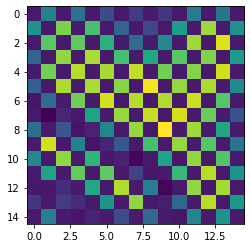

In [34]:
plt.imshow(weights[:, :, 0], interpolation='nearest')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


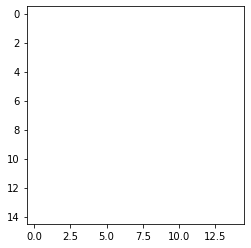

In [30]:
plt.imshow(weights, interpolation='nearest')

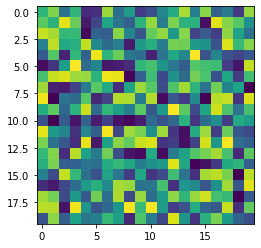

In [37]:
plt.imshow(map[:,:,2], interpolation="nearest")


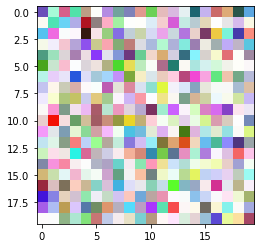

In [45]:
plt.imshow(map[:,:,:], cmap='inferno', interpolation="nearest")
